# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [63]:
x=[17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y=[10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_data=pd.DataFrame({'Age': x, 'Tardies': y})
student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

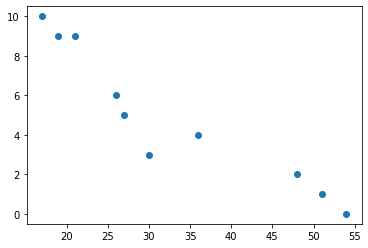

In [64]:
plt.scatter(student_data["Age"], student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [65]:
""" There seems to be a negative correlation between Age and Number of Tardies that you can see by the downward 
trend of the location of the points. So we can pose the hypothesis that the younger the students the more likely
they are to be late. """


' There seems to be a negative correlation between Age and Number of Tardies that you can see by the downward \ntrend of the location of the points. So we can pose the hypothesis that the younger the students the more likely\nthey are to be late. '

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [66]:

#correlation:
correlation=student_data.corr()

#covariance:
covariance=np.cov(student_data["Age"], student_data["Tardies"])

print(correlation)#strong negative correlation between Age & Tardies
print(covariance) #positive/negative value in the list show that one variavble is negatively influencing the other

"""We can see a very strong negative correlation between Age and Tardies that confirms our hypothesis above that
the younger the student the more late they are to class."""


              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


'We can see a very strong negative correlation between Age and Tardies that confirms our hypothesis above that\nthe younger the student the more late they are to class.'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [67]:
"""judging by the plot and the negative correlation, I would choose a linear regression model. My outcome variable 
will be Tardies (dependent variable) = y and Age my independent variable which equals x """

from sklearn import linear_model
x=student_data[["Age"]]
y=student_data[["Tardies"]]



In [68]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [69]:
print(model.intercept_)
print(model.coef_)

y_model=model.intercept_ + model.coef_[0]*x

[12.88880336]
[[-0.24282077]]


Plot your regression model on your scatter plot.

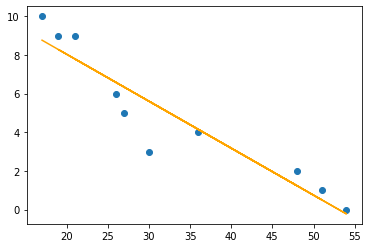

In [70]:
plt.plot(x.values, y_model.values, c='orange' ) 
plt.scatter(student_data["Age"], student_data["Tardies"])
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [71]:
"""We can see that the original value points are more or less described by my graph however escpecially for the 
values in the middle part there seems to be quite an error since the point for age 30 lays way below my graph. We
can check the Error with mean_squared_error function """


'We can see that the original value points are more or less described by my graph however escpecially for the \nvalues in the middle part there seems to be quite an error since the point for age 30 lays way below my graph. We\ncan check the Error with mean_squared_error function '

In [72]:
from sklearn.metrics import mean_squared_error

display(mean_squared_error(model.intercept_ + model.coef_[0]*student_data["Age"], student_data["Tardies"]))

"""This seems to be quite a high error so our model graph seems not the be the best one"""

1.3319201847356268

'This seems to be quite a high error so our model graph seems not the be the best one'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [73]:
import pandas as pd

data=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 4\lab-regression-analysis\your-code\vehicles.csv")
data.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [74]:
X=data[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y=data[["CO2 Emission Grams/Mile"]]

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [75]:
"""Since we have more than one independent variable to predict our outcome, we need to use a Multilinear Regression."""

model=linear_model.LinearRegression()
model.fit(X,y)
model.score(X,y) #realyy good model judging by the score


0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [76]:
"""I will look at the correlation of all variables"""

corr_df=data.corr()
corr_df["CO2 Emission Grams/Mile"]

"""We can see that that all variables besides Year have a high correlation on the CO2 Emmission and should 
therefore be considered to be potentially included in our model as long as the dependent variables are not highly 
correlated to each other since that would diminish the efficiency of your model. Next step would be to check 
if they are correlated to each other or not"""



'We can see that that all variables besides Year have a high correlation on the CO2 Emmission and should \ntherefore be considered to be potentially included in our model as long as the dependent variables are not highly \ncorrelated to each other since that would diminish the efficiency of your model. Next step would be to check \nif they are correlated to each other or not'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [77]:
x=[1,3,4,6,8,9,11,14]
y=[1,2,4,4,5,7,8,13]

df=pd.DataFrame({"Invited":x, "Attended":y})
df

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

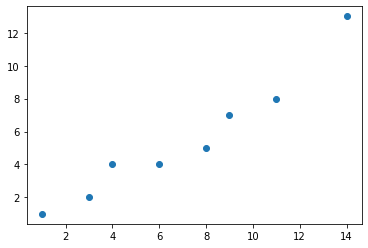

In [78]:
plt.scatter(df["Invited"], df["Attended"])
plt.show()

In [79]:
#Regression Line
model=linear_model.LinearRegression()
model.fit(df[["Invited"]], df["Attended"])

LinearRegression()

In [80]:
print(model.intercept_)
print(model.coef_)

-0.43939393939393945
[0.84848485]


In [81]:
display(mean_squared_error(model.intercept_ + model.coef_[0]*df[["Invited"]], df["Attended"]))

0.8712121212121214

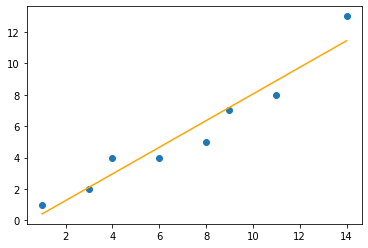

In [82]:
y_model=model.intercept_+ model.coef_[0]*df[["Invited"]]

plt.plot(df["Invited"], y_model.values, c='orange')
plt.scatter(df["Invited"], df["Attended"])
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [83]:
# Your response here. 
"""The plot + the regression line tells us that there is a positive correlation between people that were invited
and people that attended in the end, so the hypothesis we posed in the beginning is wrong. 
It is the other way around, the more I invite, the more people show up"""

'The plot + the regression line tells us that there is a positive correlation between people that were invited\nand people that attended in the end, so the hypothesis we posed in the beginning is wrong. \nIt is the other way around, the more I invite, the more people show up'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [84]:
"""The point x=14 & x=8 looks like an outlier and is quite far away from my regression line"""

#drop Row with Index 4 and 7 that contains outlier

df.drop([4,7], axis=0, inplace=True)

In [85]:
#recalculate your model

model=linear_model.LinearRegression()
model.fit(df[["Invited"]], df["Attended"])

LinearRegression()

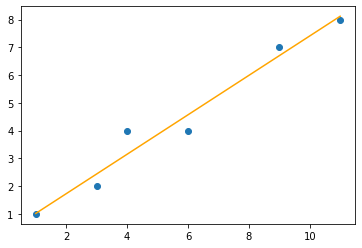

In [86]:
y_model=model.intercept_+ model.coef_[0]*df[["Invited"]]

plt.plot(df["Invited"], y_model.values, c='orange')
plt.scatter(df["Invited"], df["Attended"])
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [87]:
print(model.intercept_)
print(model.coef_)

0.30841121495326984
[0.71028037]


In [88]:
display(mean_squared_error(model.intercept_ + model.coef_[0]*df[["Invited"]], df["Attended"]))

0.22429906542056077

In [89]:
""" compared to the previous model we can see that the intercept moved up and the slope is slightly less steep.
That means that now the change of people attending moved up a bit since the intercept moved up, so the initial value of 
people attending if I invite 0 people now is positive and was negative before. The new Regression Model is more 
accurate than the previous one since the mean_squarred_error decreased. """

' compared to the previous model we can see that the intercept moved up and the slope is slightly less steep.\nThat means that now the change of people attending moved up a bit since the intercept moved up, so the initial value of \npeople attending if I invite 0 people now is positive and was negative before '